# Proyek Analisis Data: PRSA_Data_20130301-20170228
- **Nama:** Wildan Fadhil Nazaruddin
- **Email:** wildanfadhil76@gmial.com
- **ID Dicoding:** 

## Air  Data Quality

Air particulate matter in various regions has a significant impact on public health. Year-over-year data analysis is crucial in guiding informed decision-making to mitigate the effects of global warming. This project aims to analyze weather conditions and air quality across different regions of China to better understand environmental trends and their implications. The dataset used in this project includes data from 12 provinces in China, which will be examined to identify patterns and provide insights for more effective policy-making in maintaining air quality and public health. This analysis can also contribute to developing better strategies for mitigating the ongoing climate change.

### 1.1 Clases 

- PRSA_Data_Aotizhongxin: Data collected from the Aotizhongxin station.
- PRSA_Data_Changping: Data from the Changping station.
- PRSA_Data_Dingling: Data from the Dingling station.
- PRSA_Data_Dongsi: Data from the Dongsi station.
- PRSA_Data_Guanyuan: Data from the Guanyuan station.
- PRSA_Data_Gucheng: Data from the Gucheng station.
- PRSA_Data_Huairou: Data from the Huairou station.
- PRSA_Data_Tiantan: Data from the Tiantan station.
- PRSA_Data_Wanliu: Data from the Wanliu station.

### 1.2 Methodology

1. Data Collection and Cleaning:
- - -
First, we will consolidate the datasets from the 12 provinces. Data cleaning will involve handling missing values, correcting inconsistencies, and ensuring all datasets are standardized.
Descriptive Statistics:
- - - 
Descriptive statistics such as mean, median, standard deviation, and interquartile range (IQR) will be used to summarize the key characteristics of the air particulate data (PM2.5, PM10) across different provinces. Visualizations like histograms, box plots, and time series plots will be used to better understand the distribution and spread of the data.
Correlation Analysis:
- - - 
To identify the relationship between different pollutants and weather conditions, we will conduct a Pearson or Spearman correlation analysis. This will help in understanding how temperature, humidity, or wind speed affect the levels of particulate matter in the air.
Trend Analysis:
- - -
Trend analysis will be performed to observe how air quality changes over time (seasonally or annually) and across provinces. We will use time series decomposition to break down the data into trend, seasonal, and residual components, enabling a clearer view of underlying patterns.
Geospatial Analysis:
- - -
By plotting data on maps, we will explore the geographical distribution of air particulate matter across provinces, using spatial visualization tools to observe how air quality varies between regions.
Hypothesis Testing:
- - -
Statistical hypothesis tests (such as t-tests or ANOVA) will be used to compare air quality between different regions or time periods, determining whether observed differences are statistically significant.

### 1.3 Deployment

Data set

## 1 code enggine

## 2 Menentukan Pertanyaan Bisnis

- Pertanyaan 1 :
  - What are the primary trends in air quality levels (PM2.5, PM10) across the 12 provinces in China over the observed time period (2013-2017)?
- Pertanyaan 2 : 
  - How do various weather conditions (e.g., temperature, humidity, wind speed) correlate with particulate matter concentrations (PM2.5, PM10) in each province?
- Pertanyaan 3 :
   - Which regions show the highest and lowest levels of air particulate matter, and what factors contribute to these regional differences?
- Pertanyaan 4 :   
   - How do seasonal variations (e.g., winter vs. summer) impact air quality across the provinces, and what are the contributing factors?
- Pertanyaan 5 :
   - What actionable insights can be drawn from this analysis to inform policy decisions aimed at improving air quality and mitigating public health risks?


## 3 Import Semua Packages/Library yang Digunakan

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython.display import Markdown, display
from pandasql import sqldf


## 4 Data Wrangling

### 4.1 Gathering Data

#### 4.1.1 Load data 

##### 4.1.1.1 Menentukan Direktori yang di tuju

In [2]:
# Mendefinisikan direktori saat ini
current_dir = os.getcwd()

In [3]:
# Daftar nama file CSV yang ada
csv_files = [
    "PRSA_Data_Aotizhongxin_20130301-20170228.csv",
    "PRSA_Data_Changping_20130301-20170228.csv",
    "PRSA_Data_Dingling_20130301-20170228.csv",
    "PRSA_Data_Dongsi_20130301-20170228.csv",
    "PRSA_Data_Guanyuan_20130301-20170228.csv",
    "PRSA_Data_Gucheng_20130301-20170228.csv",
    "PRSA_Data_Huairou_20130301-20170228.csv",
    "PRSA_Data_Nongzhanguan_20130301-20170228.csv",
    "PRSA_Data_Shunyi_20130301-20170228.csv",
    "PRSA_Data_Tiantan_20130301-20170228.csv",
    "PRSA_Data_Wanliu_20130301-20170228.csv",
    "PRSA_Data_Wanshouxigong_20130301-20170228.csv"
]


In [4]:
# Membaca setiap file CSV dan menyimpannya dalam DataFrame
dataframes = {}

In [5]:
for csv_file in csv_files:
    # Mendapatkan nama lokasi (misalnya, Aotizhongxin, Changping, dll.) dari nama file
    location = csv_file.split('_')[2]
    
    # Menggabungkan path untuk setiap file
    file_path = os.path.join(current_dir, "data", csv_file)
    
    # Membaca CSV ke dalam DataFrame
    df = pd.read_csv(file_path)
    
    # Menyimpan DataFrame ke dalam dictionary dengan kunci nama lokasi
    dataframes[location] = df

In [6]:
aotizhongxin_df = dataframes['Aotizhongxin']

changping_df = dataframes['Changping']

dingling_df = dataframes['Dingling']

dongsi_df = dataframes['Dongsi']

guanyuan_df = dataframes['Guanyuan']

gucheng_df = dataframes['Gucheng']

huairou_df = dataframes ['Huairou']

Nongzhanguan_df = dataframes['Nongzhanguan']

shunyi_df = dataframes['Shunyi']

tiantian_df = dataframes['Tiantan']

wanliu_df = dataframes['Wanliu']

Wanshouxigong_df = dataframes['Wanshouxigong']


##### 4.1.1.2 Melihat Info Data 

###### 4.1.1.2.1 Aotizhongxin 

In [7]:
aotizhongxin_df.head(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [46]:
aotizhongxin_df.describe()

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35050.000000
mean,17532.500000,82.540623,110.210033,17.459251,59.074106,1264.692405,55.328626,13.581414,1011.851650,3.120296,0.067383,1.708496
std,10122.249256,81.956401,95.262531,22.702284,37.000918,1239.411826,57.327470,11.400426,10.404517,13.690314,0.909798,1.204071
min,1.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,58.000000,87.000000,9.000000,53.000000,900.000000,41.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,114.000000,154.000000,22.000000,81.000000,1500.000000,81.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


###### 4.1.1.2.2 changping

In [8]:
changping_df.head(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


In [9]:
dingling_df.head(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [10]:
dongsi_df.head(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


In [11]:
guanyuan_df.head(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


In [12]:
guanyuan_df.head(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


In [13]:
huairou_df.head(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,WNW,3.1,Huairou
1,2,2013,3,1,1,4.0,4.0,3.0,NaN,100.0,92.0,-2.7,1020.8,-20.5,0.0,NNW,1.5,Huairou
2,3,2013,3,1,2,4.0,4.0,NaN,NaN,100.0,91.0,-3.2,1020.6,-21.4,0.0,NW,1.8,Huairou
3,4,2013,3,1,3,3.0,3.0,3.0,2.0,NaN,NaN,-3.3,1021.3,-23.7,0.0,NNW,2.4,Huairou
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,300.0,86.0,-4.1,1022.1,-22.7,0.0,NNW,2.2,Huairou


In [14]:
Nongzhanguan_df.head(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan


In [15]:
shunyi_df.head(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


In [16]:
tiantian_df.head(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


In [17]:
wanliu_df.head(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
1,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu
2,3,2013,3,1,2,3.0,6.0,NaN,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu
3,4,2013,3,1,3,11.0,30.0,8.0,14.0,NaN,NaN,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu
4,5,2013,3,1,4,3.0,13.0,9.0,NaN,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu


In [18]:
Wanshouxigong_df.head(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
1,2,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
2,3,2013,3,1,2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
3,4,2013,3,1,3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
4,5,2013,3,1,4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong


## 5 Assessing Data

### 5.1 aotizhongxin

In [19]:
aotizhongxin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [20]:
aotizhongxin_df.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [21]:
changping_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [22]:
aotizhongxin_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
35059    False
35060    False
35061    False
35062    False
35063    False
Length: 35064, dtype: bool

In [23]:

def cek_nilai_tidak_akurat(df):
    print("Pemeriksaan nilai tidak akurat:")
    
    # Definisikan rentang nilai yang dianggap akurat untuk setiap kolom
    rentang_akurat = {
        'PM2.5': (0, 1000),
        'PM10': (0, 1500),
        'SO2': (0, 2000),
        'NO2': (0, 2000),
        'CO': (0, 200),
        'O3': (0, 500),
        'TEMP': (-50, 50),
        'PRES': (800, 1100),
        'DEWP': (-50, 50),
        'RAIN': (0, 500),
        'WSPM': (0, 100)
    }
    
    hasil_tidak_akurat = {}
    
    for kolom, (batas_bawah, batas_atas) in rentang_akurat.items():
        if kolom in df.columns:
            nilai_tidak_akurat = df[(df[kolom] < batas_bawah) | (df[kolom] > batas_atas)]
            if not nilai_tidak_akurat.empty:
                hasil_tidak_akurat[kolom] = nilai_tidak_akurat[[kolom]]
                print(f"\nNilai tidak akurat ditemukan di kolom {kolom}:")
                print(nilai_tidak_akurat[[kolom]])
    
    if not hasil_tidak_akurat:
        print("Tidak ditemukan nilai yang tidak akurat dalam rentang yang ditentukan.")
    
    return hasil_tidak_akurat

# Menjalankan fungsi
hasil_tidak_akurat = cek_nilai_tidak_akurat(aotizhongxin_df)

Pemeriksaan nilai tidak akurat:

Nilai tidak akurat ditemukan di kolom CO:
          CO
0      300.0
1      300.0
2      300.0
3      300.0
4      300.0
...      ...
35059  400.0
35060  500.0
35061  700.0
35062  700.0
35063  600.0

[31776 rows x 1 columns]


In [24]:

def cek_nilai_tidak_konsisten(df):
    print("Pemeriksaan nilai tidak konsisten:")
    
    hasil_tidak_konsisten = {}
    
    # 1. Memeriksa inkonsistensi antara PM2.5 dan PM10
    if 'PM2.5' in df.columns and 'PM10' in df.columns:
        pm_tidak_konsisten = df[df['PM2.5'] > df['PM10']]
        if not pm_tidak_konsisten.empty:
            hasil_tidak_konsisten['PM2.5 > PM10'] = pm_tidak_konsisten[['PM2.5', 'PM10']]
            print("\nDitemukan nilai PM2.5 yang lebih besar dari PM10:")
            print(pm_tidak_konsisten[['PM2.5', 'PM10']])
    
    # 2. Memeriksa inkonsistensi dalam arah angin
    if 'wd' in df.columns:
        arah_angin_valid = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 
                            'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW']
        arah_angin_tidak_valid = df[~df['wd'].isin(arah_angin_valid)]
        if not arah_angin_tidak_valid.empty:
            hasil_tidak_konsisten['Arah Angin Tidak Valid'] = arah_angin_tidak_valid[['wd']]
            print("\nDitemukan arah angin yang tidak valid:")
            print(arah_angin_tidak_valid[['wd']])
    
    # 3. Memeriksa inkonsistensi dalam suhu dan titik embun
    if 'TEMP' in df.columns and 'DEWP' in df.columns:
        suhu_tidak_konsisten = df[df['DEWP'] > df['TEMP']]
        if not suhu_tidak_konsisten.empty:
            hasil_tidak_konsisten['DEWP > TEMP'] = suhu_tidak_konsisten[['TEMP', 'DEWP']]
            print("\nDitemukan titik embun yang lebih tinggi dari suhu:")
            print(suhu_tidak_konsisten[['TEMP', 'DEWP']])
    
    # 4. Memeriksa inkonsistensi dalam kecepatan angin
    if 'WSPM' in df.columns:
        kecepatan_angin_negatif = df[df['WSPM'] < 0]
        if not kecepatan_angin_negatif.empty:
            hasil_tidak_konsisten['Kecepatan Angin Negatif'] = kecepatan_angin_negatif[['WSPM']]
            print("\nDitemukan kecepatan angin negatif:")
            print(kecepatan_angin_negatif[['WSPM']])
    
    if not hasil_tidak_konsisten:
        print("Tidak ditemukan nilai yang tidak konsisten berdasarkan kriteria yang diperiksa.")
    
    return hasil_tidak_konsisten

# Menjalankan fungsi
hasil_tidak_konsisten = cek_nilai_tidak_konsisten(aotizhongxin_df)

Pemeriksaan nilai tidak konsisten:

Ditemukan nilai PM2.5 yang lebih besar dari PM10:
       PM2.5   PM10
273    116.0   90.0
274    123.0   94.0
275    130.0  104.0
276    132.0   87.0
277    129.0   84.0
...      ...    ...
34011   93.0   90.0
34013   97.0   95.0
34025  122.0  113.0
34026  128.0  122.0
34049  155.0  151.0

[1183 rows x 2 columns]

Ditemukan arah angin yang tidak valid:
        wd
6388   NaN
11718  NaN
13412  NaN
16748  NaN
17263  NaN
...    ...
34314  NaN
34334  NaN
34560  NaN
34638  NaN
34746  NaN

[81 rows x 1 columns]


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def cek_outlier(df):
    print("Pemeriksaan outlier menggunakan metode IQR:")
    
    # Pilih kolom numerik
    kolom_numerik = df.select_dtypes(include=[np.number]).columns
    
    hasil_outlier = {}
    
    for kolom in kolom_numerik:
        Q1 = df[kolom].quantile(0.25)
        Q3 = df[kolom].quantile(0.75)
        IQR = Q3 - Q1
        
        batas_bawah = Q1 - 1.5 * IQR
        batas_atas = Q3 + 1.5 * IQR
        
        outlier = df[(df[kolom] < batas_bawah) | (df[kolom] > batas_atas)]
        
        if not outlier.empty:
            hasil_outlier[kolom] = outlier[[kolom]]
            print(f"\nOutlier ditemukan di kolom {kolom}:")
            print(f"Jumlah outlier: {len(outlier)}")
            print(f"Persentase outlier: {(len(outlier) / len(df)) * 100:.2f}%")
            print(f"Range nilai outlier: {outlier[kolom].min()} hingga {outlier[kolom].max()}")

    
    if not hasil_outlier:
        print("Tidak ditemukan outlier berdasarkan metode IQR.")
    
    return hasil_outlier

# Menjalankan fungsi
hasil_outlier = cek_outlier(aotizhongxin_df)

Pemeriksaan outlier menggunakan metode IQR:

Outlier ditemukan di kolom PM2.5:
Jumlah outlier: 1624
Persentase outlier: 4.63%
Range nilai outlier: 253.0 hingga 898.0

Outlier ditemukan di kolom PM10:
Jumlah outlier: 1080
Persentase outlier: 3.08%
Range nilai outlier: 331.0 hingga 984.0

Outlier ditemukan di kolom SO2:
Jumlah outlier: 3054
Persentase outlier: 8.71%
Range nilai outlier: 49.0 hingga 341.0

Outlier ditemukan di kolom NO2:
Jumlah outlier: 472
Persentase outlier: 1.35%
Range nilai outlier: 161.0 hingga 290.0

Outlier ditemukan di kolom CO:
Jumlah outlier: 2607
Persentase outlier: 7.43%
Range nilai outlier: 3100.0 hingga 10000.0

Outlier ditemukan di kolom O3:
Jumlah outlier: 1310
Persentase outlier: 3.74%
Range nilai outlier: 193.851 hingga 423.0

Outlier ditemukan di kolom RAIN:
Jumlah outlier: 1380
Persentase outlier: 3.94%
Range nilai outlier: 0.1 hingga 72.5

Outlier ditemukan di kolom WSPM:
Jumlah outlier: 1742
Persentase outlier: 4.97%
Range nilai outlier: 4.2 hingga 1

In [26]:


# Buat tabel markdown
table = """
| Dataset     | Tipe data                                    | Missing value                                     | Duplicate data                     | Inaccurate value                       |
|-------------|----------------------------------------------|---------------------------------------------------|-------------------------------------|----------------------------------------|
| aotizhongxin | <br>Terdapat kesalahan tipe :<br>1.data(hour,day,month,year)menjadi date_times<br><br>2.colom wd menjadi categori <br>3. station menjadi categori<br>| Terdapat   missing values:    <br> 1. 925 missing values pada PM2.5. <br>    | Terdapat 11 data yang duplikat.      | Terdapat inaccurate value pada kolom age. |
| orders_df   | Terdapat kesalahan tipe data untuk kolom order_date & delivery_date. | - | -                                   | -                                      |
| product_df  | -                                            | -                                                 | Terdapat 6 data yang duplikat.      | -                                      |
| sales_df    | -                                            | Terdapat 19 missing value pada kolom total_price. | -                                   | -                                      |
"""




In [27]:
display(Markdown(table))



| Dataset     | Tipe data                                    | Missing value                                     | Duplicate data                     | Inaccurate value                       |
|-------------|----------------------------------------------|---------------------------------------------------|-------------------------------------|----------------------------------------|
| aotizhongxin | <br>Terdapat kesalahan tipe :<br>1.data(hour,day,month,year)menjadi date_times<br><br>2.colom wd menjadi categori <br>3. station menjadi categori<br>| Terdapat   missing values:    <br> 1. 925 missing values pada PM2.5. <br>    | Terdapat 11 data yang duplikat.      | Terdapat inaccurate value pada kolom age. |
| orders_df   | Terdapat kesalahan tipe data untuk kolom order_date & delivery_date. | - | -                                   | -                                      |
| product_df  | -                                            | -                                                 | Terdapat 6 data yang duplikat.      | -                                      |
| sales_df    | -                                            | Terdapat 19 missing value pada kolom total_price. | -                                   | -                                      |


## 6 Cleaning Data

### 6.1 Aotizhongxin

#### 6.2 Merubah tipe data 

In [28]:
# Menggabungkan kolom year, month, day, dan hour menjadi satu kolom datetime
aotizhongxin_df['datetime'] = pd.to_datetime(aotizhongxin_df[['year', 'month', 'day', 'hour']])

In [29]:
aotizhongxin_df = aotizhongxin_df.drop(columns=['year', 'month', 'day', 'hour'])

In [30]:
aotizhongxin_df.set_index('datetime', inplace=True)

In [31]:
aotizhongxin_df['wd'] = aotizhongxin_df['wd'].astype('category')

In [32]:
aotizhongxin_df['station'] = aotizhongxin_df['station'].astype('category')

#### 6.1.3 Mengisi nilai yang hilang

In [38]:
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
aotizhongxin_df[pollutants] = aotizhongxin_df[pollutants].interpolate(method='time')

In [39]:
meteorological = ['TEMP', 'PRES', 'DEWP', 'RAIN']
aotizhongxin_df[meteorological] = aotizhongxin_df[meteorological].interpolate(method='linear')

In [41]:
aotizhongxin_df['wd'] = aotizhongxin_df['wd'].fillna(method='ffill')

C:\Users\wilda\AppData\Local\Temp\ipykernel_20824\3926233021.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  aotizhongxin_df['wd'] = aotizhongxin_df['wd'].fillna(method='ffill')


In [43]:
aotizhongxin_df.isna().sum()

No          0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd          0
WSPM       14
station     0
dtype: int64

In [44]:
aotizhongxin_df.head(50)

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
2013-03-01 01:00:00,2,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2013-03-01 02:00:00,3,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
2013-03-01 03:00:00,4,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
2013-03-01 04:00:00,5,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
2013-03-01 05:00:00,6,5.0,5.0,18.0,18.0,400.0,66.0,-2.2,1025.6,-19.6,0.0,N,3.7,Aotizhongxin
2013-03-01 06:00:00,7,3.0,3.0,18.0,32.0,500.0,50.0,-2.6,1026.5,-19.1,0.0,NNE,2.5,Aotizhongxin
2013-03-01 07:00:00,8,3.0,6.0,19.0,41.0,500.0,43.0,-1.6,1027.4,-19.1,0.0,NNW,3.8,Aotizhongxin
2013-03-01 08:00:00,9,3.0,6.0,16.0,43.0,500.0,45.0,0.1,1028.3,-19.2,0.0,NNW,4.1,Aotizhongxin


## 7 Exploratory Data Analysis (EDA)

### 7.1 Explore

#### 7.1.1 Aoti 

In [54]:
# Fungsi untuk menjalankan query SQL
pysqldf = lambda q: sqldf(q, globals())

# Query SQL untuk menghitung rata-rata harian PM2.5 dan PM10
query = """
SELECT 
    DATE(datetime) as date,
    AVG("PM2.5") as avg_pm25,
    AVG(PM10) as avg_pm10
FROM 
    aotizhongxin_df
GROUP BY 
    DATE(datetime)
ORDER BY 
    date
"""

# Menjalankan query
daily_avg = pysqldf(query)

C:\Users\wilda\AppData\Local\Temp\ipykernel_20824\1780021816.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([daily_avg['avg_pm25'], daily_avg['avg_pm10']], labels=['PM2.5', 'PM10'])


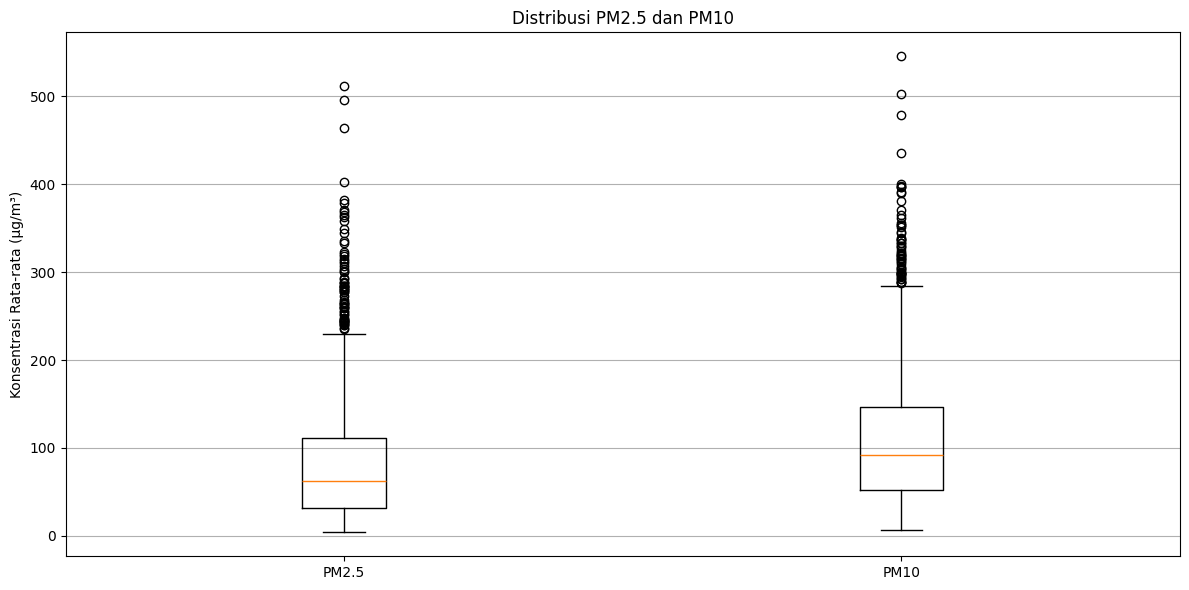

In [58]:

plt.figure(figsize=(12, 6))

# Membuat box plot
plt.boxplot([daily_avg['avg_pm25'], daily_avg['avg_pm10']], labels=['PM2.5', 'PM10'])

plt.title('Distribusi PM2.5 dan PM10')
plt.ylabel('Konsentrasi Rata-rata (µg/m³)')
plt.grid(True, axis='y')

# Menambahkan sedikit jitter pada sumbu x untuk menghindari tumpang tindih
plt.xlim(0.5, 2.5)

plt.tight_layout()
plt.show()

In [56]:
print(daily_avg.head())

         date    avg_pm25    avg_pm10
0  2013-03-01    7.125000   10.750000
1  2013-03-02   30.750000   42.083333
2  2013-03-03   76.916667  120.541667
3  2013-03-04   22.708333   44.583333
4  2013-03-05  148.875000  183.791667


In [57]:
# Menghitung statistik deskriptif
print("\nStatistik Deskriptif:")
print(daily_avg.describe())

# Menghitung korelasi antara PM2.5 dan PM10
correlation = daily_avg['avg_pm25'].corr(daily_avg['avg_pm10'])
print(f"\nKorelasi antara PM2.5 dan PM10: {correlation:.2f}")


Statistik Deskriptif:
          avg_pm25     avg_pm10
count  1461.000000  1461.000000
mean     82.540623   110.210033
std      70.240368    77.411771
min       3.875000     6.708333
25%      32.208333    52.416667
50%      62.458333    92.270833
75%     111.708333   146.375000
max     512.291667   545.875000

Korelasi antara PM2.5 dan PM10: 0.91


## 8 Visualization & Explanatory Analysis

### 8.1 Pertanyaan 1:

### 8.1 Pertanyaan 2:

## 9 Analisis Lanjutan (Opsional)

## 10 Conclusion